In [36]:
import pandas as pd
from pandas import DataFrame
from pandas import Series
import numpy as np
import datetime
from time import time

In [ ]:
df = pd.DataFrame({'AAA' : [4,5,6,7], 'BBB' : [10,20,30,40],'CCC' : [100,50,-30,-50]}); print('df','\n',df,'\n')
df_mask = pd.DataFrame({'AAA' : [True] * 4, 'BBB' : [False] * 4,'CCC' : [True, False] * 2});print('df_mask','\n',df_mask,'\n')
df.where(df_mask,-1000)

In [ ]:
df = pd.DataFrame({'AAA' : [4,5,6,7], 'BBB' : [10,20,30,40],'CCC' : [100,50,-30,-50]});print('df','\n',df,'\n')
newseries = df.loc[(df['BBB'] < 35) & (df['CCC'] >= -20), 'AAA']; newseries

In [ ]:
df = pd.DataFrame({'AAA' : [4,5,6,7], 'BBB' : [10,20,30,40],'CCC' : [100,50,-30,-50]});print('df','\n',df,'\n')
# 方法一
Crit1 = df.AAA <= 5.5
Crit2 = df.BBB == 10.0 
Crit3 = df.CCC > -40.0
AllCrit=Crit1&Crit2&Crit3
print('方法1','\n',df[AllCrit],'\n')
#Method 2
CritList=[Crit1,Crit2,Crit3]
import functools
AllCrit = functools.reduce(lambda x,y: x & y, CritList)
print('Method 2','\n',df[AllCrit],'\n')

In [ ]:
df = pd.DataFrame({'AAA' : [4,5,6,7], 'BBB' : [10,20,30,40],'CCC' : [100,50,-30,-50]});print('df','\n',df,'\n')
df.loc[(df['CCC']+10).abs().argsort()]

In [ ]:
df = pd.DataFrame({'AAA' : [4,5,6,7], 'BBB' : [10,20,30,40],'CCC' : [100,50,-30,-50]});print('df','\n',df,'\n')
df.loc[df['AAA']>5 & df.index.isin([0,2,4])] # 错误！！！注意，如果每个条件不打括号的花，那么实际上是先对'&'进行运算
df.loc[(df['AAA']>5) & (df.index.isin([0,2,4]))] # 正确
df[(df['AAA']>5) & (df.index.isin([0,2,4]))]

In [ ]:
df = pd.DataFrame({'AAA' : [4,5,6,7], 'BBB' : [10,20,30,40],'CCC' : [100,50,-30,-50]});print('df','\n',df,'\n')
df[~((df.AAA <= 6) & (df.index.isin([0,2,4])))]                                                                                                                                                                                                                             

In [ ]:
rng1 = pd.date_range('1/1/2013',periods=100,freq='D') 
rng2 = pd.date_range('1/1/2014',periods=100,freq='D') 
data = np.random.randn(100, 4)
cols = ['A','B','C','D']
df1, df2, df3 = pd.DataFrame(data, rng1, cols), pd.DataFrame(data[:50], rng1[:50], cols), pd.DataFrame(data[50:], rng2[50:], cols)
pf = pd.Panel({'df1':df1,'df2':df2,'df3':df3});pf # 数据会自动对齐(index取并集)并填充nan

In [ ]:
df = pd.DataFrame({'AAA' : [1,2,1,3], 'BBB' : [1,1,2,2], 'CCC' : [2,1,3,1]}); df
source_cols = df.columns # or some subset would work too. 
new_cols = [str(x) + "_cat" for x in source_cols]
categories = {1 : 'Alpha', 2 : 'Beta', 3 : 'Charlie' }
df[new_cols] = df[source_cols].applymap(categories.get);df # applymap可以对 DataFrame 进行元素级运算

In [ ]:
df = pd.DataFrame({'AAA' : [1,1,1,2,2,2,3,3], 'BBB' : [2,1,3,4,5,1,2,3]}); print('df','\n',df,'\n')
df.loc[df.groupby('AAA')['BBB'].idxmin()]
df.sort_values(by="BBB").groupby("AAA", as_index=False).first() # 无法保持原来的 index

In [ ]:
df = pd.DataFrame({'row' : [0,1,2],
....: 'One_X' : [1.1,1.1,1.1],
....: 'One_Y' : [1.2,1.2,1.2],
....: 'Two_X' : [1.11,1.11,1.11],
....: 'Two_Y' : [1.22,1.22,1.22]})
df = df.set_index('row');df
df.columns = pd.MultiIndex.from_tuples([tuple(c.split('_')) for c in df.columns]);df
df.stack(1).reset_index(0) # reset_index 就是把对应的index变成一个新的column或者删除(drop=True)
df.reset_index(col_level=1) # 参数 col_level 可以控制新的column进入col_level

In [ ]:
cols = pd.MultiIndex.from_tuples([ (x,y) for x in ['A','B','C'] for y in ['O','I']])
df = pd.DataFrame(np.random.randn(2,6),index=['n','m'],columns=cols); df
df.div(df['C'],level=1)
df.div(df[('C','O')],level=1) #  都是 NaN ？？？？？？？？？？？？？？？

In [ ]:
coords = [('AA','one'),('AA','six'),('BB','one'),('BB','two'),('BB','six')] 
index = pd.MultiIndex.from_tuples(coords)
df = pd.DataFrame([11,22,33,44,55],index,['MyData']); df
df.xs('AA',level=0)
df.xs('six',level=1)

In [ ]:
import itertools
index = list(itertools.product(['Ada','Quinn','Violet'],['Comp','Math','Sci']))
headr = list(itertools.product(['Exams','Labs'],['I','II']))
indx = pd.MultiIndex.from_tuples(index,names=['Student','Course']) 
cols = pd.MultiIndex.from_tuples(headr) #Notice these are un-named 
data = [[70+x+y+(x*y)%3 for x in range(4)] for y in range(9)]
df = pd.DataFrame(data,indx,cols); df
# 使用 loc
All=slice(None)
df.loc[(slice('Ada','Quinn'),'Math'),All]
df.loc[(All,'Math'),(All,'II')]
# 使用 xs
df.xs((slice('Ada','Quinn'),'Math'),level=[0,'Course'])
df.xs('Math',level=1)[[('Exams','II'),('Labs','II')]]
df.xs('Math',level=1)[list(itertools.product(['Exams','Labs'],['II']))] # ['II'] 一定要用方括号加持，因为len(('II'))和len(['II'])是不一样的！！！！！！！
df.sort_values(by=('Labs', 'II'), ascending=False)

In [ ]:
df = pd.DataFrame(np.random.randn(6,1), index=pd.date_range('2013-08-01', periods=6, freq='B'), columns=list('A'))
df.loc[df.index[3], 'A'] = np.nan;df
df.reindex(df.index[::-1]).ffill()

In [ ]:
df = pd.DataFrame({'animal': 'cat dog cat fish dog cat cat'.split(),
....: 'size': list('SSMMMLL'),
....: 'weight': [8, 10, 11, 1, 2, 12, 12],
....: 'adult' : [False] * 5 + [True] * 2});print('df','\n',df,'\n')
df.groupby('animal').apply(lambda subf: subf['size'][subf['weight'].idxmax()])
df.groupby('animal').get_group('cat')

gb = df.groupby(['animal'])
def GrowUp(x):
    avg_weight = sum(x[x['size'] == 'S'].weight * 1.5)
    avg_weight += sum(x[x['size'] == 'M'].weight * 1.25)
    avg_weight += sum(x[x['size'] == 'L'].weight)
    avg_weight /= len(x)
    return pd.Series(['L',avg_weight,True], index=['size', 'weight', 'adult'])
expected_df = gb.apply(GrowUp);expected_df

In [ ]:
import functools
S = pd.Series([i / 100.0 for i in range(1,11)])
def CumRet(x,y):
    return x * (1 + y)
def Red(x):
    return functools.reduce(CumRet,x,1.0)
S.expanding().apply(Red)

Python中reduce函数等价于下面的reduce函数。上面reduce中的'1.0'就是initializer。
```Python
def reduce(function, iterable, initializer=None):
    it = iter(iterable)
    if initializer is None:
        try:
            initializer = next(it)
        except StopIteration:
            raise TypeError('reduce() of empty sequence with no initial value')
    accum_value = initializer
    for x in it:
        accum_value = function(accum_value, x)
    return accum_value
    ```

In [50]:
df = pd.DataFrame({'A' : [1, 1, 2, 2], 'B' : [1, -1, -1, 8.8]})
def replace(g):
    mask=g<0
    g.loc[mask] = g[~mask].mean()
    return g 
df.groupby('A').transform(replace)

,A,B
0,1,1.0
1,1,-1.0
2,2,-1.0
3,2,8.8


In [ ]:
df = pd.DataFrame(np.random.randn(10, 3), columns=['A', 'B', 'C'],index=pd.date_range('1/1/2000', periods=10))
df.iloc[3:7] = np.nan;df
df.transform(lambda x: (x - x.mean()) / x.std()) # transform有两个特点：一次只进行一个column的运算；每次生成的series与原来的index是一致的，也就是长度不变

In [ ]:
df = pd.DataFrame({'code': ['foo', 'bar', 'baz'] * 2,'data': [0.16, -0.21, 0.63, 0.45, -0.59, 0.62],'flag': [False, True] * 3})
print('df','\n',df,'\n')
code_groups = df.groupby('code')
agg_n_sort_order= code_groups[['data']].transform(sum).sort_values(by='data') # 按每组加总值在原顺序基础上排序
sorted_df = df.loc[agg_n_sort_order.index];sorted_df

In [14]:
rng = pd.date_range(start="2014-10-07",periods=10,freq='2min')
ts = pd.Series(data = list(range(10)), index = rng);print('ts','\n',ts,'\n')
def MyCust(x):
    if len(x) > 2:
        return x[1] * 1.234
    return pd.NaT
mhc = {'Mean' : np.mean, 'Max' : np.max, 'Custom' : MyCust}
ts.resample("5min").apply(mhc) # 按照‘5min’的间隔进行分组，左闭右开，同一区间的进入同一组，并经过 mhc 的处理

ts 
 2014-10-07 00:00:00    0
2014-10-07 00:02:00    1
2014-10-07 00:04:00    2
2014-10-07 00:06:00    3
2014-10-07 00:08:00    4
2014-10-07 00:10:00    5
2014-10-07 00:12:00    6
2014-10-07 00:14:00    7
2014-10-07 00:16:00    8
2014-10-07 00:18:00    9
Freq: 2T, dtype: int64 



Custom  2014-10-07 00:00:00    1.234
        2014-10-07 00:05:00      NaT
        2014-10-07 00:10:00    7.404
        2014-10-07 00:15:00      NaT
Max     2014-10-07 00:00:00        2
        2014-10-07 00:05:00        4
        2014-10-07 00:10:00        7
        2014-10-07 00:15:00        9
Mean    2014-10-07 00:00:00        1
        2014-10-07 00:05:00      3.5
        2014-10-07 00:10:00        6
        2014-10-07 00:15:00      8.5
dtype: object

In [46]:
df = pd.DataFrame({'Color': 'Red Red Red Blue'.split(),'Value': [100, 150, 50, 50]}); print('df','\n',df,'\n')
df['Counts'] = df.groupby(['Color']).transform(len);print('df','\n',df,'\n')
df.groupby(['Color']).groups

df 
   Color  Value
0   Red    100
1   Red    150
2   Red     50
3  Blue     50 

df 
   Color  Value  Counts
0   Red    100       3
1   Red    150       3
2   Red     50       3
3  Blue     50       1 



{'Blue': Int64Index([3], dtype='int64'),
 'Red': Int64Index([0, 1, 2], dtype='int64')}

In [31]:
df = pd.DataFrame({u'line_race': [10, 10, 8, 10, 10, 8],u'beyer': [99, 102, 103, 103, 88, 100]},index=[u'Last Gunfighter', u'Last Gunfighter', u'Last Gunfighter',u'Paynter', u'Paynter', u'Paynter']); print('df','\n',df,'\n')
df['beyer_shifted'] = df.groupby(level=0)['beyer'].shift(1);df # 去掉groupby部分，似乎没区别呀？？？

df 
                  beyer  line_race
Last Gunfighter     99         10
Last Gunfighter    102         10
Last Gunfighter    103          8
Paynter            103         10
Paynter             88         10
Paynter            100          8 



,beyer,line_race,beyer_shifted
Last Gunfighter,99,10,NaN
Last Gunfighter,102,10,99.0
Last Gunfighter,103,8,102.0
Paynter,103,10,NaN
Paynter,88,10,103.0
Paynter,100,8,88.0


In [35]:
df = pd.DataFrame({'host':['other','other','that','this','this'],'service':['mail','web','mail','mail','web'],'no':[1, 2, 1, 2, 1]}).set_index(['host', 'service']);print('df','\n',df,'\n')
mask = df.groupby(level=0).agg('idxmax');print('mask','\n',mask,'\n')
df_count = df.loc[mask['no']].reset_index();df_count

df 
                no
host  service    
other mail      1
      web       2
that  mail      1
this  mail      2
      web       1 

mask 
                  no
host               
other  (other, web)
that   (that, mail)
this   (this, mail) 



,host,service,no
0,other,web,2
1,that,mail,1
2,this,mail,2


In [58]:
df = pd.DataFrame([0, 1, 0, 1, 1, 1, 0, 1, 1], columns=['A'])
df.A.groupby((df.A != df.A.shift()).cumsum()).groups
df.A.groupby((df.A != df.A.shift()).cumsum()).head(10)#
df.A.groupby((df.A != df.A.shift()).cumsum()).cumsum() # 奇怪，为什么没有分组显示？？？

0    0
1    1
2    0
3    1
4    2
5    3
6    0
7    1
8    2
Name: A, dtype: int64

In [79]:
 df = pd.DataFrame(data={'Case' : ['A','A','A','B','A','A','B','A','A'],
.....: 'Data' : np.random.randn(9)})
print('GroupBy','\n',(1*(df['Case']=='B')).cumsum().rolling(window=3,min_periods=1).median(),'\n')
dfs = list(zip(*df.groupby((1*(df['Case']=='B')).cumsum().rolling(window=3,min_periods=1).median()))) # 注意，此处groupby的结果实际上就是类似字典的键值对（key,value）,
# 在前方加上一个'*'号(引导所有位置参数)，再配合zip使用，实际上就是对groupby的键值对进行解压
dfs[1][0]

GroupBy 
 0    0.0
1    0.0
2    0.0
3    0.0
4    1.0
5    1.0
6    1.0
7    2.0
8    2.0
Name: Case, dtype: float64 



,Case,Data
0,A,1.048513
1,A,-1.396684
2,A,-0.872018
3,B,-0.021556


Python中zip与groupby的联合。
```python
import itertools as it
iterable = ((key, list(group)) for (key, group) in it.groupby([1, 2, 3, 4, 5, 2, 3, 4, 2], lambda p: p==2))
for (x, y), _ in zip(iterable, iterable):
    print(x, y)
iterable = ((key, list(group)) for (key, group) in it.groupby([1, 2, 3, 4, 5, 2, 3, 4, 2], lambda p: p==2))
list(iterable)
```

In [100]:
df = pd.DataFrame(data={'Province' : ['ON','QC','BC','AL','AL','MN','ON'],
.....: 'City' : ['Toronto','Montreal','Vancouver','Calgary','Edmonton','Winnipeg','Windsor'],
.....: 'Sales' : [13,6,16,8,4,3,1]});print('df','\n',df,'\n')
table = pd.pivot_table(df,values=['Sales'],index=['Province'],columns=['City'],aggfunc=np.sum,margins=True);print('table','\n',table,'\n')
table.stack('City')

df 
         City Province  Sales
0    Toronto       ON     13
1   Montreal       QC      6
2  Vancouver       BC     16
3    Calgary       AL      8
4   Edmonton       AL      4
5   Winnipeg       MN      3
6    Windsor       ON      1 

table 
            Sales                                                           
City     Calgary Edmonton Montreal Toronto Vancouver Windsor Winnipeg   All
Province                                                                   
AL           8.0      4.0      NaN     NaN       NaN     NaN      NaN  12.0
BC           NaN      NaN      NaN     NaN      16.0     NaN      NaN  16.0
MN           NaN      NaN      NaN     NaN       NaN     NaN      3.0   3.0
ON           NaN      NaN      NaN    13.0       NaN     1.0      NaN  14.0
QC           NaN      NaN      6.0     NaN       NaN     NaN      NaN   6.0
All          8.0      4.0      6.0    13.0      16.0     1.0      3.0  51.0 



Sales
Province City            
AL       All         12.0
         Calgary      8.0
         Edmonton     4.0
BC       All         16.0
         Vancouver   16.0
MN       All          3.0
         Winnipeg     3.0
ON       All         14.0
         Toronto     13.0
         Windsor      1.0
QC       All          6.0
         Montreal     6.0
All      All         51.0
         Calgary      8.0
         Edmonton     4.0
         Montreal     6.0
         Toronto     13.0
         Vancouver   16.0
         Windsor      1.0
         Winnipeg     3.0

In [104]:
# Frequency table like plyr in R
grades = [48,99,75,80,42,80,72,68,36,78]
df = pd.DataFrame( {'ID': ["x%d" % r for r in range(10)],
                    'Gender' : ['F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'M','M'],
                    'ExamYear': ['2007','2007','2007','2008','2008','2008','2008','2009','2009','2009'],
                    'Class': ['algebra', 'stats', 'bio', 'algebra', 'algebra', 'stats', 'stats', 'algebra', 'bio', 'bio'],
                    'Participated': ['yes','yes','yes','yes','no','yes','yes','yes','yes','yes'],
                    'Passed': ['yes' if x > 50 else 'no' for x in grades],
                    'Employed': [True,True,True,False,False,False,False,True,True,False],
                    'Grade': grades});print('df','\n',df,'\n')
df.groupby('ExamYear').agg({'Participated': lambda x: x.value_counts()['yes'],
                            'Passed': lambda x: sum(x == 'yes'),
                            'Employed' : lambda x : sum(x),
                            'Grade' : lambda x : sum(x) / len(x)})

df 
      Class  Employed ExamYear Gender  Grade  ID Participated Passed
0  algebra      True     2007      F     48  x0          yes     no
1    stats      True     2007      M     99  x1          yes    yes
2      bio      True     2007      F     75  x2          yes    yes
3  algebra     False     2008      M     80  x3          yes    yes
4  algebra     False     2008      F     42  x4           no     no
5    stats     False     2008      M     80  x5          yes    yes
6    stats     False     2008      F     72  x6          yes    yes
7  algebra      True     2009      M     68  x7          yes    yes
8      bio      True     2009      M     36  x8          yes     no
9      bio     False     2009      M     78  x9          yes    yes 



,Participated,Passed,Employed,Grade
ExamYear,,,,
2007,3,2,3,74.000000
2008,3,3,0,68.500000
2009,3,2,2,60.666667


In [110]:
 df = pd.DataFrame({'value': np.random.randn(36)},
.....: index=pd.date_range('2011-01-01', freq='M', periods=36));print('df','\n',df,'\n')
pd.pivot_table(df, index=df.index.month, columns=df.index.year,
.....: values='value', aggfunc='sum')

df 
                value
2011-01-31  1.520087
2011-02-28 -0.336713
2011-03-31  0.516494
2011-04-30 -0.719249
2011-05-31 -0.798936
2011-06-30 -0.365051
2011-07-31  0.492802
2011-08-31 -0.983591
2011-09-30  0.503714
2011-10-31  2.617904
2011-11-30 -0.847026
2011-12-31 -0.737232
2012-01-31  0.100074
2012-02-29  0.469688
2012-03-31  1.009763
2012-04-30 -1.522925
2012-05-31 -0.589053
2012-06-30  0.405481
2012-07-31  0.289616
2012-08-31 -0.773507
2012-09-30  0.270195
2012-10-31  0.529735
2012-11-30 -0.495256
2012-12-31  1.259274
2013-01-31  0.303545
2013-02-28  0.237236
2013-03-31  1.122692
2013-04-30 -0.444558
2013-05-31  0.335325
2013-06-30 -2.939471
2013-07-31 -0.479198
2013-08-31 -1.000247
2013-09-30  0.872611
2013-10-31  0.672900
2013-11-30  0.333249
2013-12-31  0.201533 



,2011,2012,2013
1,1.520087,0.100074,0.303545
2,-0.336713,0.469688,0.237236
3,0.516494,1.009763,1.122692
4,-0.719249,-1.522925,-0.444558
5,-0.798936,-0.589053,0.335325
6,-0.365051,0.405481,-2.939471
7,0.492802,0.289616,-0.479198
8,-0.983591,-0.773507,-1.000247
9,0.503714,0.270195,0.872611
10,2.617904,0.529735,0.672900


In [119]:
df = pd.DataFrame(data={'A' : [[2,4,8,16],[100,200],[10,20,30]], 'B' : [['a','b','c'],['jj','kk'],['ccc']]},index=['I','II','III']);print('df','\n',df,'\n')
def SeriesFromSubList(aList):
    return pd.Series(aList)
df_orgz = pd.concat(dict((ind,row.apply(SeriesFromSubList)) for ind,row in df.iterrows()));df_orgz # pd.concat配合dict也能生成DataFrame
# [i for i in zip(*df.iterrows())]

df 
                  A          B
I    [2, 4, 8, 16]  [a, b, c]
II      [100, 200]   [jj, kk]
III   [10, 20, 30]      [ccc] 



0    1    2     3
I   A    2    4    8  16.0
    B    a    b    c   NaN
II  A  100  200  NaN   NaN
    B   jj   kk  NaN   NaN
III A   10   20   30   NaN
    B  ccc  NaN  NaN   NaN

In [124]:
df = pd.DataFrame(data=np.random.randn(2000,2)/10000,
.....: index=pd.date_range('2001-01-01',periods=2000),
.....: columns=['A','B']);#print('df','\n',df,'\n')
def gm(aDF,Const):
    v = ((((aDF.A+aDF.B)+1).cumprod())-1)*Const
    return (aDF.index[0],v.iloc[-1])
S = pd.Series(dict([ gm(df.iloc[i:min(i+51,len(df)-1)],5) for i in range(len(df)-50) ])); S

2001-01-01   -0.000003
2001-01-02    0.002159
2001-01-03    0.002261
2001-01-04    0.002714
2001-01-05    0.002002
2001-01-06    0.001195
2001-01-07    0.001391
2001-01-08    0.001921
2001-01-09    0.002883
2001-01-10    0.000901
2001-01-11    0.000706
2001-01-12    0.001992
2001-01-13    0.001513
2001-01-14    0.001489
2001-01-15    0.001324
2001-01-16    0.001970
2001-01-17    0.001656
2001-01-18    0.002051
2001-01-19    0.000370
2001-01-20    0.000635
2001-01-21   -0.000250
2001-01-22   -0.000421
2001-01-23    0.000289
2001-01-24   -0.000418
2001-01-25   -0.000373
2001-01-26   -0.000911
2001-01-27    0.000072
2001-01-28    0.000805
2001-01-29    0.000568
2001-01-30   -0.000270
                ...   
2006-04-05   -0.001970
2006-04-06   -0.000600
2006-04-07   -0.000769
2006-04-08   -0.000177
2006-04-09   -0.000122
2006-04-10    0.000681
2006-04-11    0.000901
2006-04-12    0.000530
2006-04-13   -0.000832
2006-04-14   -0.000742
2006-04-15   -0.000884
2006-04-16   -0.001513
2006-04-17 

In [125]:
rng = pd.date_range(start = '2014-01-01',periods = 100)
df = pd.DataFrame({'Open' : np.random.randn(len(rng)),
                   'Close' : np.random.randn(len(rng)), 
                   'Volume' : np.random.randint(100,2000,len(rng))},index=rng);print('df','\n',df,'\n')
def vwap(bars): return ((bars.Close*bars.Volume).sum()/bars.Volume.sum())  # vwap是时间维度上关于volume的加权平均价格
window = 5
s = pd.concat([ (pd.Series(vwap(df.iloc[i:i+window]), index=[df.index[i+window]])) for i in range(len(df)-window) ]);

df 
                Close      Open  Volume
2014-01-01 -0.285479  1.989249     632
2014-01-02  1.085798  1.288741     683
2014-01-03  1.001610 -0.028647    1067
2014-01-04  0.731951  1.525071    1576
2014-01-05 -0.253062  0.212457     850
2014-01-06  2.029445  0.430524    1924
2014-01-07 -0.636088  1.226008     493
2014-01-08  0.070495  1.812905    1667
2014-01-09 -0.214684  0.015072     609
2014-01-10  0.181727 -0.417450    1944
2014-01-11 -0.506975  0.336886    1821
2014-01-12  0.704679  0.992377     895
2014-01-13  1.557393 -0.718602    1997
2014-01-14 -0.827359  0.887002     932
2014-01-15  0.658453 -0.440078     934
2014-01-16  0.223906  0.343295    1644
2014-01-17  2.048245  0.286974    1165
2014-01-18 -1.284892  1.979537    1748
2014-01-19  0.572941 -0.988715    1355
2014-01-20 -0.328302  1.241756    1373
2014-01-21  1.076282 -0.607569    1414
2014-01-22  0.397605 -0.488174    1871
2014-01-23  0.017022 -0.057660    1677
2014-01-24  0.447840  1.578144    1990
2014-01-25 -0.092231

In [131]:
dates = pd.date_range('2000-01-01', periods=5);print(dates)
dates.to_period(freq='M').to_timestamp()

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05'],
              dtype='datetime64[ns]', freq='D')


DatetimeIndex(['2000-01-01', '2000-01-01', '2000-01-01', '2000-01-01',
               '2000-01-01'],
              dtype='datetime64[ns]', freq=None)

In [135]:
rng = pd.date_range('2000-01-01', periods=6)
df1 = pd.DataFrame(np.random.randn(6, 3), index=rng, columns=['A', 'B', 'C']);print(df1)
df2 = df1.copy()
df = df1.append(df2,ignore_index=False); df # 如果不忽略index的话，那么包括index在内都是简单的append，index不用对齐

                   A         B         C
2000-01-01  0.226176 -0.998960 -0.674168
2000-01-02  1.486666 -0.910204 -0.204576
2000-01-03 -0.001053 -0.935087  1.278604
2000-01-04 -0.322186  0.990615  0.728042
2000-01-05 -0.055343  0.590623 -0.081432
2000-01-06  0.168021  0.020453 -0.619111


,A,B,C
2000-01-01,0.226176,-0.998960,-0.674168
2000-01-02,1.486666,-0.910204,-0.204576
2000-01-03,-0.001053,-0.935087,1.278604
2000-01-04,-0.322186,0.990615,0.728042
2000-01-05,-0.055343,0.590623,-0.081432
2000-01-06,0.168021,0.020453,-0.619111
2000-01-01,0.226176,-0.998960,-0.674168
2000-01-02,1.486666,-0.910204,-0.204576
2000-01-03,-0.001053,-0.935087,1.278604
2000-01-04,-0.322186,0.990615,0.728042


In [143]:
df = pd.DataFrame(data={'Area' : ['A'] * 5 + ['C'] * 2,
.....: 'Bins' : [110] * 2 + [160] * 3 + [40] * 2,
.....: 'Test_0' : [0, 1, 0, 1, 2, 0, 1],
.....: 'Data' : np.random.randn(7)})
df['Test_1'] = df['Test_0'] - 1;print(df)
pd.merge(df, df, left_on=['Bins', 'Area','Test_0'], right_on=['Bins', 'Area','Test_1'],suffixes=('_L','_R'),how='outer') # how='inner'找出指定指标相同的数据；当how='outer'时，无法merge部分以nan填充

  Area  Bins      Data  Test_0  Test_1
0    A   110  0.834162       0      -1
1    A   110  0.767730       1       0
2    A   160  0.565421       0      -1
3    A   160  0.424011       1       0
4    A   160  0.585489       2       1
5    C    40  1.675746       0      -1
6    C    40  0.068042       1       0


,Area,Bins,Data_L,Test_0_L,Test_1_L,Data_R,Test_0_R,Test_1_R
0,A,110,0.834162,0.0,-1.0,0.767730,1.0,0.0
1,A,110,0.767730,1.0,0.0,NaN,NaN,NaN
2,A,160,0.565421,0.0,-1.0,0.424011,1.0,0.0
3,A,160,0.424011,1.0,0.0,0.585489,2.0,1.0
4,A,160,0.585489,2.0,1.0,NaN,NaN,NaN
5,C,40,1.675746,0.0,-1.0,0.068042,1.0,0.0
6,C,40,0.068042,1.0,0.0,NaN,NaN,NaN
7,A,110,NaN,NaN,NaN,0.834162,0.0,-1.0
8,A,160,NaN,NaN,NaN,0.565421,0.0,-1.0
9,C,40,NaN,NaN,NaN,1.675746,0.0,-1.0


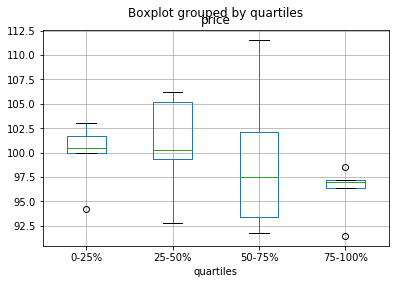

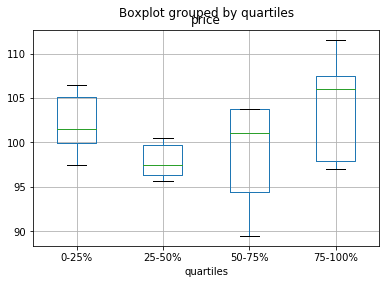

In [4]:
import matplotlib.pyplot as plt
df = pd.DataFrame({u'stratifying_var': np.random.uniform(0, 100, 20),u'price': np.random.normal(100, 5, 20)})
df[u'quartiles'] = pd.qcut(df[u'stratifying_var'],4,labels=[u'0-25%', u'25-50%', u'50-75%', u'75-100%'])
df.boxplot(column=u'price', by=u'quartiles')
plt.show()

In [9]:
i = pd.date_range('20000101',periods=10000)
df = pd.DataFrame(dict(year = i.year, month = i.month, day = i.day))
df.head()
# Method 1
%timeit pd.to_datetime(df.year*10000+df.month*100+df.day,format='%Y%m%d')
# Method 2
ds = df.apply(lambda x: "%04d%02d%02d" % (x['year'],x['month'],x['day']),axis=1);ds
%timeit pd.to_datetime(ds)

100 loops, best of 3: 5.47 ms per loop
100 loops, best of 3: 2.14 ms per loop


In [22]:
from io import StringIO
data = """;;;;
;;;;
;;;;
;;;;
;;;;
;;;;
;;;;
;;;;
;;;;
;;;;
date;Param1;Param2;Param4;Param5
m;C;m;m
;;;;
01.01.1990 00:00;1;1;2;3
01.01.1990 01:00;5;3;4;5
01.01.1990 02:00;9;5;6;7
01.01.1990 03:00;13;7;8;9
01.01.1990 04:00;17;9;10;11
01.01.1990 05:00;21;11;12;13"""

# 跳过某些行
pd.read_csv(StringIO(data), sep=';', skiprows=[11,12],index_col=0, parse_dates=True, header=10) # StringIO()内存中读写

# 先读取columns，再读取数据
columns = pd.read_csv(StringIO(data), sep=';', header=10, nrows=10).columns
pd.read_csv(StringIO(data), sep=';', index_col=0,header=12, parse_dates=True, names=columns)

,Param1,Param2,Param4,Param5
date,,,,
1990-01-01 00:00:00,1,1,2,3
1990-01-01 01:00:00,5,3,4,5
1990-01-01 02:00:00,9,5,6,7
1990-01-01 03:00:00,13,7,8,9
1990-01-01 04:00:00,17,9,10,11
1990-01-01 05:00:00,21,11,12,13


In [28]:
# Storing Attributes to a group node
df = pd.DataFrame(np.random.randn(8,3))
store = pd.HDFStore('test.h5')
store.put('df',df)
# you can store an arbitrary python object via pickle
store.get_storer('df').attrs.my_attribute = dict(A = 10)
store.get_storer('df').attrs.my_attribute
store.close()

In [39]:
s=Series(pd.date_range('2012-1-1',periods=3,freq='D'))
print(s-s.max(),'\n')
s-datetime.datetime(2011,1,1,3,5)
s-datetime.timedelta(minutes=5)
y=s-s.shift(1);y 
y[1]=np.nan;y # 对时间赋值 np.nan，其结果就是NAT

0   -2 days
1   -1 days
2    0 days
dtype: timedelta64[ns] 



0      NaT
1      NaT
2   1 days
dtype: timedelta64[ns]

In [50]:
def set_axis_alias(cls, axis, alias):
    if axis not in cls._AXIS_NUMBERS:
        raise Exception("invalid axis [%s] for alias [%s]" % (axis, alias))
    cls._AXIS_ALIASES[alias] = axis   #  cls._AXIS_NUMBERS 和  df2._AXIS_ALIASES 是两个字典，前者将不同轴映射到数字上，后者将不同轴映射到某个别名alias
def clear_axis_alias(cls, axis, alias):
    if axis not in cls._AXIS_NUMBERS:
        raise Exception("invalid axis [%s] for alias [%s]" % (axis, alias))
    cls._AXIS_ALIASES.pop(alias,None)
set_axis_alias(pd.DataFrame,'columns', 'myaxis2')
df2 = pd.DataFrame(np.random.randn(3,2),columns=['c1','c2'],index=['i1','i2','i3']);print('df2','\n',df2,'\n')
df2.sum(axis='myaxis2')
df2.sum(axis='rows')

df2 
           c1        c2
i1 -1.478465  0.572400
i2 -0.206112  1.242355
i3 -1.179390 -0.332591 



c1   -2.863967
c2    1.482163
dtype: float64

In [55]:
import itertools
def expand_grid(data_dict):
    rows = itertools.product(*data_dict.values())
    return pd.DataFrame.from_records(rows, columns=data_dict.keys())
df = expand_grid({'height': [60, 70],'weight': [100, 140, 180],'sex': ['Male', 'Female']});df

,height,weight,sex
0,60,100,Male
1,60,100,Female
2,60,140,Male
3,60,140,Female
4,60,180,Male
5,60,180,Female
6,70,100,Male
7,70,100,Female
8,70,140,Male
9,70,140,Female


In [57]:
d={'height': [60, 70],'weight': [100, 140, 180],'sex': ['Male', 'Female']}
list(itertools.product(*d.values()))

[(60, 100, 'Male'),
 (60, 100, 'Female'),
 (60, 140, 'Male'),
 (60, 140, 'Female'),
 (60, 180, 'Male'),
 (60, 180, 'Female'),
 (70, 100, 'Male'),
 (70, 100, 'Female'),
 (70, 140, 'Male'),
 (70, 140, 'Female'),
 (70, 180, 'Male'),
 (70, 180, 'Female')]

In [67]:
data = np.zeros((2,), dtype=[('A', 'i4'),('B', 'f4'),('C', 'a10')]);data # 给不同列指明格式，出乎意料的是竟然使用的是np.zeros
data[:] = [(1,2.,'Hello'), (2,3.,"World")];data
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


In [68]:
pd.DataFrame({('a', 'b'): {('A', 'B'): 1, ('A', 'C'): 2},
              ('a', 'a'): {('A', 'C'): 3, ('A', 'B'): 4},
              ('a', 'c'): {('A', 'B'): 5, ('A', 'C'): 6},
              ('b', 'a'): {('A', 'C'): 7, ('A', 'B'): 8},
              ('b', 'b'): {('A', 'D'): 9, ('A', 'B'): 10}})

a              b      
       a    b    c    a     b
A B  4.0  1.0  5.0  8.0  10.0
  C  3.0  2.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

In [70]:
# DataFrame.from_dict takes a dict of dicts or a dict of array-like sequences and returns a DataFrame. 
# DataFrame.from_records takes a list of tuples or an ndarray with structured dtype
data = np.zeros((2,), dtype=[('A', 'i4'),('B', 'f4'),('C', 'a10')])
data[:] = [(1,2.,'Hello'), (2,3.,"World")]
pd.DataFrame.from_records(data, index='C')

,A,B
C,,
b'Hello',1,2.0
b'World',2,3.0
